<a href="https://colab.research.google.com/github/SM-30/IPV/blob/main/Text_Classification_using_sentence_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(2022)

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
data = pd.read_csv('combined_flagsFinal.csv')

In [ ]:
import spacy
import string
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


{'call', 'within', "'re", 'while', 'then', 'those', 'something', 'became', 'get', 'from', 'though', 'hereby', 'n’t', 'more', 'just', 'these', 'part', 'nothing', 'using', 'and', '‘s', 'yourselves', 'yours', 'anyhow', 'really', 'you', 'either', 'formerly', 'through', 'whatever', 'say', 'were', 'ca', 'now', 'about', 'behind', 'at', 'hundred', 'throughout', 'via', 'becoming', 'whole', 'few', 'mostly', 'noone', 'upon', 'again', 'most', 'am', 'any', 'anything', 'twelve', 'much', 'themselves', 'front', 'below', 'a', 'n‘t', 'be', '‘m', 'somehow', 'ourselves', 'thereby', 'own', 'the', 'two', "'ll", 'well', 'whether', '‘re', 'rather', 'us', 'herself', 'elsewhere', 'does', 'due', 'down', 'off', 'had', 'namely', 'together', 'whereupon', 'that', 'three', 'afterwards', 'nevertheless', 'nine', 'however', 'everyone', 'also', 'doing', 'will', 'whom', '’re', 'top', 'by', 'would', 'such', '’ve', 'back', 'wherein', 'someone', 'further', 'made', 'hers', 'whereas', 'indeed', 'with', 'only', "'m", 'cannot', 

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)

  mytokens = [ word.lemma_.lower().strip() for word in doc]

  mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

  sentence = " ".join(mytokens)

  return sentence

In [ ]:
data['tokenize'] = data['description'].apply(spacy_tokenizer)

In [ ]:
data['embeddings'] = data['tokenize'].apply(model.encode)

In [ ]:
data.head()

,Unnamed: 0,description,relevant,tokenize,embeddings
0,0,As seen on the American Academy of Pediatrics ...,0,american academy pediatrics parenting web site...,"[-0.028368458, -0.036183942, 0.024328923, 0.04..."
1,1,Beacon is a GPS Tracking application that allo...,1,beacon gps tracking application allow track un...,"[-0.058390453, -0.05572978, 0.02040583, -0.049..."
2,2,Every day you have to listen to dozens of phon...,1,day listen dozen phone friend family client re...,"[-0.10754763, 0.04450979, -0.014298023, -0.106..."
3,3,Secure Parental Control is dedicated to suppor...,1,secure parental control dedicate support paren...,"[-0.05934501, 0.018552184, 0.012807868, -0.015..."
4,4,Everyone’s contact lists are a complete chaos....,0,contact list complete chaos family work friend...,"[-0.11153438, -0.0016920345, -0.014649005, 0.0..."


In [ ]:
X = data['embeddings'].to_list()
Y = data['relevant'].to_list()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = LR.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predicted))
print("Precision: ", metrics.precision_score(Y_test, predicted))
print("Recall: ", metrics.recall_score(Y_test, predicted))

Accuracy:  0.95
Precision:  0.9649122807017544
Recall:  0.9322033898305084


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, predicted)
print(cm)
accuracy_score(Y_test, predicted)

[[118   4]
 [  8 110]]


0.95

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


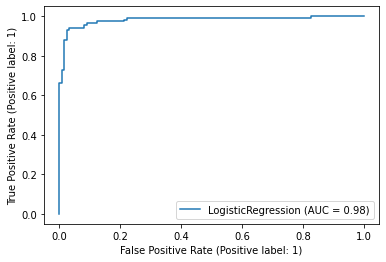

In [ ]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(LR, X_test, Y_test)

In [ ]:
# 5-Fold Cross validation
from sklearn.model_selection import cross_val_score

print("Training Data")
scores = cross_val_score(LR, X_train, Y_train, cv=5)
print(scores)
print("Average Score: ", np.mean(scores))
print("\nTest Data")
scores = cross_val_score(LR, X_test, Y_test, cv=5)
print(scores)
print("Average Score: ", np.mean(scores))

Training Data
[0.89285714 0.96428571 0.9375     0.89285714 0.98214286]
Average Score:  0.9339285714285713

Test Data
[0.91666667 0.95833333 0.89583333 0.91666667 0.89583333]
Average Score:  0.9166666666666666


In [ ]:
#Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn import metrics
predicted = Forest.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predicted))
print("Precision: ", metrics.precision_score(Y_test, predicted))
print("Recall: ", metrics.recall_score(Y_test, predicted))

Accuracy:  0.9083333333333333
Precision:  0.98
Recall:  0.8305084745762712


In [ ]:
n_predict = np.array(predicted)
n_test = np.array(Y_test)

In [ ]:
print(np.concatenate((n_predict.reshape(len(n_predict),1), n_test.reshape(len(n_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


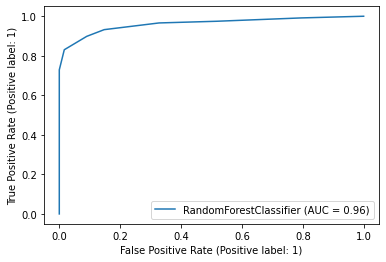

In [ ]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(Forest, X_test, Y_test)

In [ ]:
#SVM Classification

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, Y_train)

SVC(random_state=0)

In [ ]:
from sklearn import metrics
predicted = SVM.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predicted))
print("Precision: ", metrics.precision_score(Y_test, predicted))
print("Recall: ", metrics.recall_score(Y_test, predicted))

Accuracy:  0.9583333333333334
Precision:  0.9736842105263158
Recall:  0.940677966101695


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


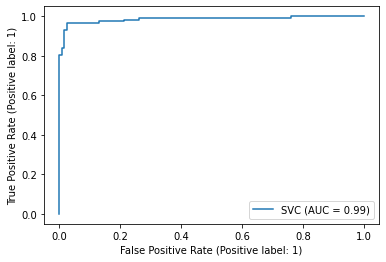

In [ ]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(SVM, X_test, Y_test)